# Data Analysis
Import the libraries that will be used to try an explore the data

In [79]:
import numpy as np

#import pandad used for data frames to import and store the data set
import pandas as pd

#import re used for splitting up the time ordered into day month year
import re

#used to display pd dataframes
from IPython.display import display

#Used for plotting Graphs
import matplotlib.pyplot as plt

## Import Data
Next import the provided .csv file and store it in a pandas dataframe object

In [2]:
data = pd.read_csv('data.csv')


Once the data is in a dataframe some simple analysis can be easily done. The mean, median and count of values can be easily calculated. 

In [3]:
#Print how many orders for each product
print(data["Product"].value_counts())


#Print how many orders from each Restruaunt
#print(data["Restaurant"].value_counts())

#Print how many order from restruaunt for each product is there for restruant 8
print(data["Product"][data["Restaurant"] == 8].value_counts())

#print Quantity min, max, mean
print(data[" Quantity"].min())
print(data[" Quantity"].max())
print(data[" Quantity"].mean())

38    913
Name: Product, dtype: int64
38    23
Name: Product, dtype: int64
1
8
1.43702081051


At the moment the column "Ordered At" is storing a string value as can be seen below.

In [4]:
type(data["Ordered At"][0])

str

This should be converted to a timestamp object as this will make the data more easy to use. 

In [5]:
def convert_timestamp(data):
    
    #Create new empty column in data set to store new timestamp object.
    if "Time Stamp" not in list(data.columns):
        data["Time Stamp"] = np.nan


    #Convert the string in the "Ordered At" column into a Pandas datestamp object and store
    # in new column

    for index, timestamp in data["Ordered At"].iteritems():
    
        #timestamp objects are in the form of US dates so convert the string into US date by switching the day and month
        timestampTemp = timestamp.split("/")
        timestampTemp1 = str(timestampTemp[1] + "/" + timestampTemp[0] + "/" + timestampTemp[2])
    
        #convert new string into timestamp object and store in new time stamp column
        data.set_value(index,"Time Stamp",pd.Timestamp(timestampTemp1))
    
    return data

In [6]:
data = convert_timestamp(data)
data.head()

,Restaurant,Product,Quantity,Price,Ordered At,Time Stamp
0,8,38,1,37.0,11/09/16 23:42,2016-09-11 23:42:00
1,161,38,1,54.5,12/09/16 15:37,2016-09-12 15:37:00
2,177,38,1,39.0,12/09/16 15:38,2016-09-12 15:38:00
3,28,38,1,40.0,12/09/16 15:53,2016-09-12 15:53:00
4,202,38,1,54.5,12/09/16 16:03,2016-09-12 16:03:00


As the times stamp is now stored as a timestamp object it is easier to pick out the month, day or year.

In [7]:
print(data["Time Stamp"][0].day)
print(data["Time Stamp"][0].month)
print(data["Time Stamp"][0].year)

11
9
2016


You can also then find out the amount of time between two timestamps

In [8]:
print((data["Time Stamp"][0] - data["Time Stamp"][200]))
print((data["Time Stamp"][0] - data["Time Stamp"][200]).days)
print((data["Time Stamp"][0] - data["Time Stamp"][200]).seconds)

-54 days +02:35:00
-54
9300


And also the min or max timestamp

In [9]:
print(data["Time Stamp"].min())
print(data["Time Stamp"].max())


2016-09-11 23:42:00
2017-02-06 17:37:00


In [10]:
#print all orders by restaurant 8
display(data[(data["Restaurant"] == 8) & (data["Product"]==38)])
restaurant8 = data[(data["Restaurant"] == 8) & (data["Product"]==38)]

,Restaurant,Product,Quantity,Price,Ordered At,Time Stamp
0,8,38,1,37.0,11/09/16 23:42,2016-09-11 23:42:00
24,8,38,1,37.0,19/09/16 22:25,2016-09-19 22:25:00
37,8,38,1,37.0,21/09/16 23:11,2016-09-21 23:11:00
56,8,38,1,37.0,26/09/16 23:21,2016-09-26 23:21:00
80,8,38,1,37.0,03/10/16 23:30,2016-10-03 23:30:00
107,8,38,1,48.8,09/10/16 22:47,2016-10-09 22:47:00
120,8,38,1,48.8,12/10/16 23:14,2016-10-12 23:14:00
198,8,38,1,48.8,04/11/16 01:15,2016-11-04 01:15:00
223,8,38,1,45.0,10/11/16 00:02,2016-11-10 00:02:00
237,8,38,1,45.0,13/11/16 23:58,2016-11-13 23:58:00


A function can be created which takes the dataset, restaurant number, & product number, and returns the data set but with an additional column stating when the next order of this product was placed by the same restaurant.

In [11]:
def add_next_order_date (data, restaurant, product):
    """
    Function that takes a data set and returns the same data set but with a new column giving the next order date next to 
    the product number given.
    
    """
    #If the next order date column exists do nothing, else create it and fill with blanks
    if "Next Order Date" not in list(data.columns):
        data["Next Order Date"] = np.nan
    
    #a temp data set is created to filter out the resturaunt orders of the requested preoduct
    tempData = data[(data["Restaurant"] == restaurant) & (data["Product"]==product)]
    
    #a for loop is used to loop through each of the items in the temp data set. The temp data set has the same index values
    #as in the original data set
    
    for index, timestamp in tempData["Time Stamp"].iteritems():
        
        # a blank list is used and then filled with every timestamp found to be larger than the one for the order
        timestamp_list = []
        next_order_found = False
        
        #another for loop is used to compare the time stamp of the order being considered to all other
        #orders of that product from that restaurant. This may not be very efficient and could maybe
        #be improved 
        for index2, timestamp2 in tempData["Time Stamp"].iteritems():
            
            #if the timestamp is greater i.e after the order timestamp add it to the list
            if timestamp2 > timestamp:
                timestamp_list.append(timestamp2)
                next_order_found = True
        #this if function means that the latest order of that product can be identified as
        #the column will still have the nan object in it.
        
        if next_order_found:
            #set the value of the next order date in the original data set to the minimum greater 
            #date found through the search
            data.set_value(index,"Next Order Date",min(timestamp_list))     

    return data

In [12]:
data_test = data

In [13]:
data_test[data_test["Restaurant"] == 161]

,Restaurant,Product,Quantity,Price,Ordered At,Time Stamp
1,161,38,1,54.5,12/09/16 15:37,2016-09-12 15:37:00
25,161,38,1,54.5,19/09/16 22:28,2016-09-19 22:28:00
63,161,38,1,54.5,28/09/16 16:20,2016-09-28 16:20:00
119,161,38,1,54.5,12/10/16 22:52,2016-10-12 22:52:00
152,161,38,1,54.5,26/10/16 14:54,2016-10-26 14:54:00
185,161,38,1,54.5,01/11/16 23:24,2016-11-01 23:24:00
255,161,38,1,54.5,16/11/16 16:06,2016-11-16 16:06:00


In [14]:
data_test = add_next_order_date(data_test,161,38)

In [15]:
data_test[data_test["Restaurant"]==161]

,Restaurant,Product,Quantity,Price,Ordered At,Time Stamp,Next Order Date
1,161,38,1,54.5,12/09/16 15:37,2016-09-12 15:37:00,2016-09-19 22:28:00
25,161,38,1,54.5,19/09/16 22:28,2016-09-19 22:28:00,2016-09-28 16:20:00
63,161,38,1,54.5,28/09/16 16:20,2016-09-28 16:20:00,2016-10-12 22:52:00
119,161,38,1,54.5,12/10/16 22:52,2016-10-12 22:52:00,2016-10-26 14:54:00
152,161,38,1,54.5,26/10/16 14:54,2016-10-26 14:54:00,2016-11-01 23:24:00
185,161,38,1,54.5,01/11/16 23:24,2016-11-01 23:24:00,2016-11-16 16:06:00
255,161,38,1,54.5,16/11/16 16:06,2016-11-16 16:06:00,NaN


This function can be modified slightly to instead provide the number of days between this order and the next order.

In [277]:
def add_next_order_date_days (data, restaurant, product):
    """
    Function that takes a data set and returns the same data set but with a new column giving the next order date next to 
    the product number given.
    
    """
    if "Next Order Days" not in list(data.columns):
        data["Next Order Days"] = np.nan
    
    tempData = data[(data["Restaurant"] == restaurant) & (data["Product"]==product)]
    
    for index, timestamp in tempData["Time Stamp"].iteritems():
        timestamp_list = []
        next_order_found = False
    
        for index2, timestamp2 in tempData["Time Stamp"].iteritems():
            if timestamp2 > timestamp:
                timestamp_list.append(timestamp2)
                next_order_found = True
    
        if next_order_found:
            next_date = min(timestamp_list)
            days = (next_date - timestamp).days
            data.set_value(index,"Next Order Days",days)  
            data.set_value(index,"Next Order Date",next_date)

    return data

In [17]:
data_test = add_next_order_days(data_test,161,38)
data_test[data_test["Restaurant"]==161]

,Restaurant,Product,Quantity,Price,Ordered At,Time Stamp,Next Order Date,Next Order Days
1,161,38,1,54.5,12/09/16 15:37,2016-09-12 15:37:00,2016-09-19 22:28:00,7.0
25,161,38,1,54.5,19/09/16 22:28,2016-09-19 22:28:00,2016-09-28 16:20:00,8.0
63,161,38,1,54.5,28/09/16 16:20,2016-09-28 16:20:00,2016-10-12 22:52:00,14.0
119,161,38,1,54.5,12/10/16 22:52,2016-10-12 22:52:00,2016-10-26 14:54:00,13.0
152,161,38,1,54.5,26/10/16 14:54,2016-10-26 14:54:00,2016-11-01 23:24:00,6.0
185,161,38,1,54.5,01/11/16 23:24,2016-11-01 23:24:00,2016-11-16 16:06:00,14.0
255,161,38,1,54.5,16/11/16 16:06,2016-11-16 16:06:00,NaN,NaN


In [18]:
# by creating a set of all the values in the restaurant column we can then loop through all the
# restaurants without duplication. 
resturaunt_set = set(data_test["Restaurant"])

for resturaunt in resturaunt_set:
    data_test = add_next_order_days (data_test,resturaunt,38)

In [19]:
data_test.head()

,Restaurant,Product,Quantity,Price,Ordered At,Time Stamp,Next Order Date,Next Order Days
0,8,38,1,37.0,11/09/16 23:42,2016-09-11 23:42:00,NaN,7.0
1,161,38,1,54.5,12/09/16 15:37,2016-09-12 15:37:00,2016-09-19 22:28:00,7.0
2,177,38,1,39.0,12/09/16 15:38,2016-09-12 15:38:00,NaN,23.0
3,28,38,1,40.0,12/09/16 15:53,2016-09-12 15:53:00,NaN,6.0
4,202,38,1,54.5,12/09/16 16:03,2016-09-12 16:03:00,NaN,NaN


We can create a function that calls all the functions we have previously created so that all the above data manipulation can be completed at the same time of importing the data.

In [275]:
def import_data(data):
    #import data to pandas data frame
    
    #creat list of all the restaurants used to loop functions.
    resturaunt_set = set(data_test["Restaurant"])
    
    #convert ordered at to timestamp
    data = convert_timestamp(data)
    
    #looping per resturaunt
    for resturaunt in resturaunt_set:
        data = add_next_order_days (data,resturaunt,38)
        data = add_next_order_date (data,resturaunt,38)
    
    return data

In [276]:
new_test_data = import_data(data = pd.read_csv("data.csv"))
new_test_data.head()

,Restaurant,Product,Quantity,Price,Ordered At,Time Stamp,Next Order Days,Next Order Date
0,8,38,1,37.0,11/09/16 23:42,2016-09-11 23:42:00,7.0,2016-09-19 22:25:00
1,161,38,1,54.5,12/09/16 15:37,2016-09-12 15:37:00,7.0,2016-09-19 22:28:00
2,177,38,1,39.0,12/09/16 15:38,2016-09-12 15:38:00,23.0,2016-10-06 11:50:00
3,28,38,1,40.0,12/09/16 15:53,2016-09-12 15:53:00,6.0,2016-09-18 22:46:00
4,202,38,1,54.5,12/09/16 16:03,2016-09-12 16:03:00,NaN,NaN


## Data analysis and predictions
Create new function which sums up all the orders per restaurant and saves this info in a new data frame.

In [36]:
 def find_next_order_date(data, timestamp, restaurant, product):
    # a blank list is used and then filled with every timestamp found to be larger than the one for the order
        timestamp_list = []
        next_order_found = False
        tempdata = data[:][(data["Restaurant"] == restaurant) & (data["Product"] == product)]
        #another for loop is used to compare the time stamp of the order being considered to all other
        #orders of that product from that restaurant. This may not be very efficient and could maybe
        #be improved 
        for index, timestamp2 in tempdata["Time Stamp"].iteritems():
            
            #if the timestamp is greater i.e after the order timestamp add it to the list
            if timestamp2 > timestamp:
                timestamp_list.append(timestamp2)
                next_order_found = True
        #this if function means that the latest order of that product can be identified as
        #the column will still have the nan object in it.
        
        if next_order_found:
            #set the value of the next order date in the original data set to the minimum greater 
            #date found through the search
            return min(timestamp_list)
        else:
            return float(np.nan)

In [22]:
def resturaunt_orders_count(data, product):
    resturaunt_set = set(data["Restaurant"])
    orders_count = pd.DataFrame(columns = ("Restaurant","Total Orders"))

    for temp_restaurant in resturaunt_set:
        count = data["Product"][data["Restaurant"]==temp_restaurant].count()
        temp_frame = pd.DataFrame(data = [[temp_restaurant,count]],columns=["Restaurant","Total Orders"])
        orders_count = orders_count.append(temp_frame)

    orders_count = orders_count.reset_index(drop=True)
        
    return orders_count
    

In [23]:
test_rank = resturaunt_orders_count(new_test_data,38)

In [24]:
test_rank.sort_values("Total Orders", ascending=False).head()

,Restaurant,Total Orders
31,84.0,48.0
12,28.0,36.0
75,227.0,26.0
24,73.0,25.0
63,174.0,24.0


## Prediction Function

2No. functions which aim to predict the date the restaurant will make their next order based on how long it has been between orders previously. 

In [49]:
def dto_mean_predict(data,restaurant,product, current_date = None, last_order = None):
    """
    
    """
    temp_data = data[:][(data["Restaurant"]==restaurant)&(data["Product"]==product)]
    days_predict = temp_data["Next Order Days"].mean()
    if last_order == None:
        last_order = temp_data["Time Stamp"][temp_data["Next Order Date"].isnull()].all()
        #print(type(last_order))
    
    order_date_predict = last_order + pd.Timedelta(days_predict,'d')
    
    if current_date:
        
        #If a date is passed into the function a score is calculated to quantify how late an order is compared to 
        #the prediction model. a 
        lateness_score = (current_date - order_date_predict).days / days_predict
        return order_date_predict, lateness_score
    else:
        return order_date_predict

def dto_median_predict(data,restaurant,product, current_date = None, last_order = None):
    """
    
    """
    temp_data = data[:][(data["Restaurant"]==restaurant)&(data["Product"]==product)]
    days_predict = temp_data["Next Order Days"].median()
    if last_order ==None:
        last_order = temp_data["Time Stamp"][temp_data["Next Order Date"].isnull()].all()
    
    #print(type(last_order))
    order_date_predict = last_order + pd.Timedelta(days_predict,'d')
    
    if current_date:
        
        #If a date is passed into the function a score is calculated to quantify how late an order is compared to 
        #the prediction model. a 
        lateness_score = (current_date - order_date_predict).days / days_predict
        return order_date_predict, lateness_score
    
    else:
        
        return order_date_predict

In [26]:
display(new_test_data[:][new_test_data["Restaurant"] == 84].tail())
dto_mean_predict(new_test_data,84,38, pd.Timestamp(year = 2017, month = 2, day = 22))

,Restaurant,Product,Quantity,Price,Ordered At,Time Stamp,Next Order Days,Next Order Date
776,84,38,1,45.0,22/01/17 22:04,2017-01-22 22:04:00,3.0,2017-01-25 23:54:00
802,84,38,1,45.0,25/01/17 23:54,2017-01-25 23:54:00,4.0,2017-01-29 23:56:00
834,84,38,1,45.0,29/01/17 23:56,2017-01-29 23:56:00,1.0,2017-01-31 23:48:00
846,84,38,1,45.0,31/01/17 23:48,2017-01-31 23:48:00,3.0,2017-02-04 01:08:00
893,84,38,1,45.0,04/02/17 01:08,2017-02-04 01:08:00,NaN,NaN


(Timestamp('2017-02-06 14:24:35.702400'), 5.875)

In [27]:
dto_median_predict(new_test_data,84,38)

Timestamp('2017-02-06 01:08:00')

Based on the prediction above and data currently loaded into new_test_data the next order for this product by restaurant 84 should be on 06/02/2017. 

# Test train model
To check if the prediction models we create are useful I will split the data up into a 'train' set used to create the models and a 'test' set to test them against.

In [28]:
all_data = import_data('data1.csv')
display(all_data.head())
display(all_data.tail())

,Restaurant,Product,Quantity,Price,Currency,Ordered At,Time Stamp,Next Order Days,Next Order Date
0,8,38,1,37.0,EUR,11/09/2016 23:42,2016-09-11 23:42:00,7.0,2016-09-19 22:25:00
1,161,38,1,54.5,EUR,12/09/2016 15:37,2016-09-12 15:37:00,7.0,2016-09-19 22:28:00
2,177,38,1,39.0,EUR,12/09/2016 15:38,2016-09-12 15:38:00,23.0,2016-10-06 11:50:00
3,28,38,1,40.0,EUR,12/09/2016 15:53,2016-09-12 15:53:00,6.0,2016-09-18 22:46:00
4,202,38,1,54.5,EUR,12/09/2016 16:03,2016-09-12 16:03:00,NaN,NaN


,Restaurant,Product,Quantity,Price,Currency,Ordered At,Time Stamp,Next Order Days,Next Order Date
921,484,38,1,43.0,EUR,07/02/2017 00:12,2017-02-07 00:12:00,NaN,NaN
922,247,38,1,48.8,EUR,07/02/2017 00:12,2017-02-07 00:12:00,NaN,NaN
923,709,38,1,45.0,EUR,07/02/2017 00:13,2017-02-07 00:13:00,NaN,NaN
924,28,38,1,48.8,EUR,07/02/2017 00:13,2017-02-07 00:13:00,NaN,NaN
925,145,38,1,43.0,EUR,07/02/2017 00:14,2017-02-07 00:14:00,NaN,NaN


In [29]:
split_date = pd.Timestamp(day = 1, month = 1, year = 2017)
train = all_data[:][all_data["Time Stamp"]<split_date]
test = all_data[:][all_data["Time Stamp"]>=split_date]

#Next order data allready filled in to wipe it and re add it. 
train["Next Order Date"] = np.nan
train["Next Order Days"] = np.nan

train_r_set = set(train["Restaurant"])

for i in train_r_set:
    train = add_next_order_date(train,i,38)
    train = add_next_order_days(train,i,38)

In [30]:
train.head()

,Restaurant,Product,Quantity,Price,Currency,Ordered At,Time Stamp,Next Order Days,Next Order Date
0,8,38,1,37.0,EUR,11/09/2016 23:42,2016-09-11 23:42:00,7.0,2016-09-19 22:25:00
1,161,38,1,54.5,EUR,12/09/2016 15:37,2016-09-12 15:37:00,7.0,2016-09-19 22:28:00
2,177,38,1,39.0,EUR,12/09/2016 15:38,2016-09-12 15:38:00,23.0,2016-10-06 11:50:00
3,28,38,1,40.0,EUR,12/09/2016 15:53,2016-09-12 15:53:00,6.0,2016-09-18 22:46:00
4,202,38,1,54.5,EUR,12/09/2016 16:03,2016-09-12 16:03:00,NaN,NaN


In [31]:
train.tail()

,Restaurant,Product,Quantity,Price,Currency,Ordered At,Time Stamp,Next Order Days,Next Order Date
605,282,38,6,45.0,EUR,31/12/2016 01:00,2016-12-31 01:00:00,NaN,NaN
606,292,38,1,48.8,EUR,31/12/2016 01:00,2016-12-31 01:00:00,NaN,NaN
607,537,38,1,48.8,EUR,31/12/2016 01:01,2016-12-31 01:01:00,NaN,NaN
608,75,38,1,48.8,EUR,31/12/2016 01:03,2016-12-31 01:03:00,NaN,NaN
609,64,38,2,48.8,EUR,31/12/2016 01:05,2016-12-31 01:05:00,NaN,NaN


Prediction likely to be easiest with restaurants that the most data is available for so first find which restaurants have made the most orders over the 'train' period.

In [32]:
train_r_order = resturaunt_orders_count(train,38)
test_r_order = resturaunt_orders_count(test,38)

In [33]:
display(train_r_order.sort_values("Total Orders", ascending=False).head())
display(test_r_order.sort_values("Total Orders", ascending=False).head())

,Restaurant,Total Orders
25,84.0,36.0
9,28.0,29.0
3,8.0,19.0
108,470.0,18.0
19,73.0,17.0


,Restaurant,Total Orders
22,84.0,13.0
41,174.0,11.0
55,292.0,11.0
33,114.0,10.0
48,227.0,10.0


In [34]:
#make prediction of next order from restaurant 84

p1 = dto_mean_predict(train,84,38)
p2 = dto_median_predict(train,84,38)

display(p1)
display(p2)

Timestamp('2017-01-01 14:37:51.465600')

Timestamp('2017-01-01 00:55:00')

In [35]:
most_recent = train["Time Stamp"][(train["Next Order Date"].isnull())&(train["Product"]==38) & (train["Restaurant"] == 84)].all()
display(most_recent)

Timestamp('2016-12-30 00:55:00')

In [37]:
actual_next_order = find_next_order_date(all_data,most_recent,84,38)
display(actual_next_order)

Timestamp('2017-01-03 02:05:00')

In [38]:
display((p1 - actual_next_order).days)
display((p2 - actual_next_order).days)

-2

-3

In [39]:
p1 = dto_mean_predict(train,84,38, last_order = actual_next_order)
p2 = dto_median_predict(train,84,38, last_order = actual_next_order)
display(p1)
display(p2)
type(p1)

Timestamp('2017-01-05 15:47:51.465600')

Timestamp('2017-01-05 02:05:00')

pandas.tslib.Timestamp

In [40]:
actual_next_order = find_next_order_date(all_data,most_recent,84,38)
display(actual_next_order)

Timestamp('2017-01-03 02:05:00')

In [41]:
display((p1 - actual_next_order).days)
display((p2 - actual_next_order).days)

2

2

In [42]:
next_order = find_next_order_date(all_data,actual_next_order,84,38)
display(next_order)

Timestamp('2017-01-04 22:46:00')

In [43]:
all_data[:][all_data["Restaurant"]==84]

,Restaurant,Product,Quantity,Price,Currency,Ordered At,Time Stamp,Next Order Days,Next Order Date
13,84,38,1,39.99,EUR,14/09/2016 23:23,2016-09-14 23:23:00,3.0,2016-09-18 22:43:00
20,84,38,1,39.99,EUR,18/09/2016 22:43,2016-09-18 22:43:00,2.0,2016-09-20 23:12:00
29,84,38,1,39.99,EUR,20/09/2016 23:12,2016-09-20 23:12:00,3.0,2016-09-24 00:54:00
47,84,38,1,39.99,EUR,24/09/2016 00:54,2016-09-24 00:54:00,2.0,2016-09-26 23:19:00
55,84,38,1,39.99,EUR,26/09/2016 23:19,2016-09-26 23:19:00,2.0,2016-09-28 23:20:00
66,84,38,1,39.99,EUR,28/09/2016 23:20,2016-09-28 23:20:00,4.0,2016-10-03 00:26:00
70,84,38,1,39.99,EUR,03/10/2016 00:26,2016-10-03 00:26:00,2.0,2016-10-05 23:48:00
93,84,38,1,39.99,EUR,05/10/2016 23:48,2016-10-05 23:48:00,3.0,2016-10-09 22:47:00
108,84,38,1,48.80,EUR,09/10/2016 22:47,2016-10-09 22:47:00,10.0,2016-10-19 23:28:00
138,84,38,1,39.90,EUR,19/10/2016 23:28,2016-10-19 23:28:00,3.0,2016-10-23 23:25:00


In [50]:
def predict_test (start_date,train,data, restaurant, product = 38):
    
    """
    Function which outputs a table showing order date predictions against the actual
    order date, to be used to see if the prediction models are accurate. 
    
    """
    
    columns = ['Prediction 1','Prediction 2','actual order date','difference 1','difference 2']
    testlist = pd.DataFrame(columns=columns)
    index = 0
        
    while type(start_date) == pd.tslib.Timestamp :
        p1 = dto_mean_predict(train,restaurant,product, last_order = start_date)
        p2 = dto_median_predict(train,restaurant,product, last_order = start_date)
        actual_next_order = find_next_order_date(data,start_date,restaurant,product)
        
        if type(actual_next_order) == pd.tslib.Timestamp:
            difference1 = (p1 - actual_next_order).days
            difference2 = (p2 - actual_next_order).days
            frame_data = {
            'Prediction 1':p1,
            'Prediction 2':p2,
            'actual order date':actual_next_order,
            'difference 1':difference1,
            'difference 2':difference2            
            }
            tempframe = pd.DataFrame(data=frame_data, columns = columns, index=[index])
            testlist = testlist.append(tempframe)
            index +=1
        
        start_date = actual_next_order
        
    return testlist 

In [45]:
most_recent = train["Time Stamp"][(train["Next Order Date"].isnull())&(train["Product"]==38) & (train["Restaurant"] == 84)].all()
display(most_recent)

Timestamp('2016-12-30 00:55:00')

In [161]:
prediction = predict_test(most_recent,train,all_data,84,38)
display(prediction)

,Prediction 1,Prediction 2,actual order date,difference 1,difference 2
0,2017-01-01 14:37:51.465600,2017-01-01 00:55:00,2017-01-03 02:05:00,-2.0,-3.0
1,2017-01-05 15:47:51.465600,2017-01-05 02:05:00,2017-01-04 22:46:00,0.0,0.0
2,2017-01-07 12:28:51.465600,2017-01-06 22:46:00,2017-01-07 00:07:00,0.0,-1.0
3,2017-01-09 13:49:51.465600,2017-01-09 00:07:00,2017-01-11 23:14:00,-3.0,-3.0
4,2017-01-14 12:56:51.465600,2017-01-13 23:14:00,2017-01-15 23:03:00,-2.0,-2.0
5,2017-01-18 12:45:51.465600,2017-01-17 23:03:00,2017-01-17 22:52:00,0.0,0.0
6,2017-01-20 12:34:51.465600,2017-01-19 22:52:00,2017-01-21 00:17:00,-1.0,-2.0
7,2017-01-23 13:59:51.465600,2017-01-23 00:17:00,2017-01-22 22:04:00,0.0,0.0
8,2017-01-25 11:46:51.465600,2017-01-24 22:04:00,2017-01-25 23:54:00,-1.0,-2.0
9,2017-01-28 13:36:51.465600,2017-01-27 23:54:00,2017-01-29 23:56:00,-2.0,-3.0


In [166]:
prediction_plot = prediction.plot(x= 'Prediction 1', y= 'difference 1', style=".", label = "prediction 1", color = 'blue')
prediction.plot(x= 'Prediction 2', y= 'difference 2', style=".", color = 'red', ax=prediction_plot, label = "prediction 2")
prediction.plot(x= 'actual order date', y= 'difference 1', style=".", color = 'green', ax=prediction_plot, label = "actual")

In [164]:
pd.DataFrame(data = np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

plot_test.plot(kind='scatter', x='a', y='b')

In [163]:
plt.clf()

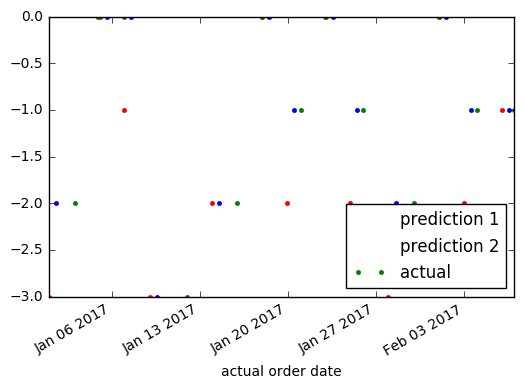

In [167]:
plt.show()

In [254]:
def find_lateness(data,restaurant,product, current_date, last_order):
    """
    
    """
    temp_data = data[:][(data["Restaurant"]==restaurant)&(data["Product"]==product)]
    days_predict = temp_data["Next Order Days"].mean()
    
    
    try:
        order_date_predict = last_order + pd.Timedelta(days_predict,'d')
        lateness_score = (current_date - order_date_predict).days / days_predict
    
    #a negative lateness means that the order is not late as teh predicted order date is ahead of the current date
    
    #a positive lateness means that the order is late and should be expected soon. 
    
    except:
        lateness_score = np.nan
    
    
    return lateness_score
    

In [255]:
def lateness_table(date, product, data):
    resturaunt_set = set(data["Restaurant"])
    
    
    j = 0
    lateness = pd.DataFrame(columns=["Restaurant","Product","Lateness"])
    for r in resturaunt_set:
        try:
            last_order = max(data["Time Stamp"][(data["Restaurant"]==r)&(data["Product"]==product)
                                            & (data["Time Stamp"]<= date)])
        
            temp_lateness = find_lateness(data,r,product,date,last_order)
        
        
            frame_data = {
                "Restaurant":r,
                "Product":product,
                "Lateness":temp_lateness
            }
        except:
            frame_data = {
                "Restaurant":r,
                "Product":product,
                "Lateness":np.nan  
                }
            
            
            
        temp_frame = pd.DataFrame(data=frame_data,index=[j],columns=["Restaurant","Product","Lateness"])
        lateness = lateness.append(temp_frame)
        j+=1
    return lateness
    

In [270]:
test_lateness = lateness_table(most_recent,38,all_data)
test_lateness.sort_values("Lateness", ascending=False)

,Restaurant,Product,Lateness
11,539.0,38.0,18.600000
117,427.0,38.0,13.142857
0,516.0,38.0,10.000000
126,464.0,38.0,7.928571
119,440.0,38.0,7.153846
65,186.0,38.0,5.142857
76,235.0,38.0,5.025641
58,161.0,38.0,3.193548
64,177.0,38.0,2.652174
17,46.0,38.0,2.200000


In [271]:
all_data[:][all_data["Restaurant"]==186]

,Restaurant,Product,Quantity,Price,Currency,Ordered At,Time Stamp,Next Order Days,Next Order Date
26,186,38,1,51.23,EUR,19/09/2016 23:54,2016-09-19 23:54:00,14.0,2016-10-04 23:43:00
83,186,38,1,51.23,EUR,04/10/2016 23:43,2016-10-04 23:43:00,NaN,NaN


In [214]:
bool(np.nan)

True

In [236]:
pd.NaT

NaT

In [240]:
pd.np.nan

nan